###**Let's install the required libraries**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install plotly-express
!pip install geopandas
import plotly.express as px
import pandas as pd
import numpy as np
import geopandas as gpd
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.cm as cm
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

###**Now let's load our dataframes and take a look at the first 5 rows.**

In [3]:
file_path = '/content/drive/MyDrive/project_pupils/pupils.csv'
df = pd.read_csv(file_path, sep = ';')

df.head()

,idTerytGmina,idTerytWojewodztwo,Wojewodztwo,Powiat,Gmina,KrajPochodzenia,lb_uczniow cudzoziemcow
0,264011,2,Dolnoslaskie,Wrocław,Wrocław,AFGANISTAN,11
1,265011,2,Dolnoslaskie,Wałbrzych,Wałbrzych,AFGANISTAN,1
2,402011,4,Kujawsko-Pomorskie,brodnicki,Brodnica,AFGANISTAN,1
3,463011,4,Kujawsko-Pomorskie,Toruń,Toruń,AFGANISTAN,4
4,601142,6,Lubelskie,bialski,Sławatycze,AFGANISTAN,1


###**Let's take a look at the data type in our dataframe.**

In [4]:
df.dtypes

idTerytGmina                int64
idTerytWojewodztwo          int64
Wojewodztwo                object
Powiat                     object
Gmina                      object
KrajPochodzenia            object
lb_uczniow cudzoziemcow     int64
dtype: object

###**And check if there are empty lines that can affect the correctness of the results.**

In [5]:
empty_rows = df['KrajPochodzenia'].isnull().any().sum()
empty_rows

0

###**Great, we don't have empty lines. For the sake of convenience, let's replace the column name lb_uczniow cudzoziemcow with Number_pupils**

In [6]:
df = df.rename(columns={'lb_uczniow cudzoziemcow': 'Number_pupils'})
df.head()

,idTerytGmina,idTerytWojewodztwo,Wojewodztwo,Powiat,Gmina,KrajPochodzenia,Number_pupils
0,264011,2,Dolnoslaskie,Wrocław,Wrocław,AFGANISTAN,11
1,265011,2,Dolnoslaskie,Wałbrzych,Wałbrzych,AFGANISTAN,1
2,402011,4,Kujawsko-Pomorskie,brodnicki,Brodnica,AFGANISTAN,1
3,463011,4,Kujawsko-Pomorskie,Toruń,Toruń,AFGANISTAN,4
4,601142,6,Lubelskie,bialski,Sławatycze,AFGANISTAN,1


###**Finished with preparatory work. Let's start the analysis. First, let's look at the distribution of the number of foreign pupils by Voivodeship.**

In [7]:
result_wojewodztwo = df.groupby(['Wojewodztwo'])['Number_pupils'].sum().reset_index()

result_wojewodztwo = result_wojewodztwo.sort_values('Number_pupils', ascending = False)
result_wojewodztwo

,Wojewodztwo,Number_pupils
6,Mazowieckie,72495
0,Dolnoslaskie,45912
14,Wielkopolskie,35859
11,Slaskie,31439
5,Malopolskie,28738
10,Pomorskie,28669
4,Lódzkie,21767
15,Zachodniopomorskie,18103
1,Kujawsko-Pomorskie,12557
3,Lubuskie,12496


###**As we can see, the largest number of foreign pupils is in the Mazovian Voivodeship. Perhaps one of the reasons is that the capital of Poland, Warsaw, is located in the Mazovian Voivodeship. I visualize the data on the map so that it is better perceived.**

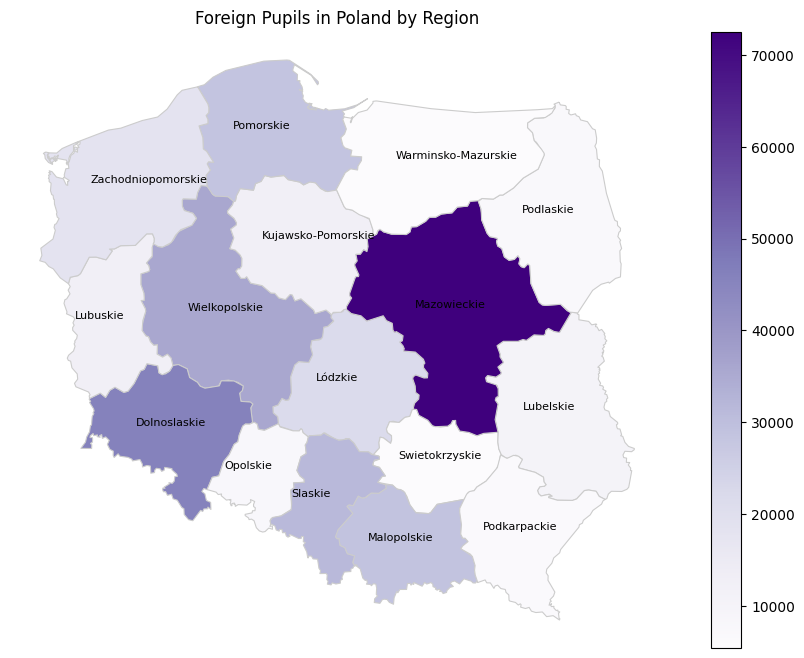

In [8]:
geojson_file = '/content/drive/MyDrive/project_pupils/polska-wojewodztwa.geojson'
map_data = gpd.read_file(geojson_file)


merged_data = map_data.merge(result_wojewodztwo, left_on='name', right_on='Wojewodztwo', how='left')


merged_data = merged_data.to_crs('EPSG:3395')


fig, ax = plt.subplots(figsize=(12, 8))
merged_data.plot(column='Number_pupils', cmap='Purples', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)


ax.set_title('Foreign Pupils in Poland by Region')
ax.set_axis_off()


offset_x = -27
offset_y = 2
for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['Wojewodztwo']):
    ax.annotate(label, xy=(x, y), xytext=(offset_x, offset_y), textcoords="offset points", fontsize=8)





plt.show()

###**Next, let's categorize the number of international pupils based on their country of origin.**



In [9]:
result_pupils = df.groupby(['KrajPochodzenia'])['Number_pupils'].sum().reset_index().sort_values('Number_pupils', ascending = False)
result_pupils.head()

,KrajPochodzenia,Number_pupils
142,UKRAINA,307945
16,BIAŁORUŚ,23436
112,ROSJA,4342
150,WIETNAM,1943
51,INDIE,1170


###**As we can see, most schoolchildren are from such countries as Ukraine, Belarus, Russia, Vietnam and India.**
And now let's look at the world map of the country where the students come from. To do this, the first thing we have to do is to translate the Polish country names into English. Because the map we are using supports English names. And create a column Original

In [10]:
unique_values = df['KrajPochodzenia'].unique()
print(unique_values)

['AFGANISTAN' 'ALBANIA' 'ALGIERIA' 'ANDORA' 'ANGOLA' 'ARABIA SAUD.'
 'ARGENTYNA' 'ARMENIA' 'AUSTRALIA' 'AUSTRIA' 'AZERBEJDŻAN' 'BANGLADESZ'
 'BELGIA' 'BELIZE' 'BENIN' 'BERMUDY' 'BIAŁORUŚ' 'BOLIWIA' 'BOŚN.I HERC.'
 'BRAZYLIA' 'BUŁGARIA' 'CHILE' 'CHINY' 'CHORWACJA' 'CYPR' 'CZAD'
 'CZARNOGÓRA' 'CZECHY' 'DANIA' 'DOMINIKANA' 'EGIPT' 'EKWADOR' 'ERYTREA'
 'ESTONIA' 'ETIOPIA' 'FILIPINY' 'FINLANDIA' 'FRANCJA' 'GABON' 'GAMBIA'
 'GHANA' 'GRECJA' 'GRENLANDIA' 'GRUZJA' 'GUJANA' 'GWATEMALA' 'GWINEA'
 'HAITI' 'HISZPANIA' 'HOLANDIA' 'HONGKONG' 'INDIE' 'INDONEZJA' 'IRAK'
 'IRAN' 'IRLANDIA' 'ISLANDIA' 'IZRAEL' 'JAMAJKA' 'JAPONIA' 'JEMEN'
 'JORDANIA' 'KAMERUN' 'KAMPUCZA' 'KANADA' 'KATAR' 'KAZACHSTAN' 'KENIA'
 'KIRGIZJA' 'KOLUMBIA' 'KONGO' 'KOREA PŁD.' 'KOREA R.L.D.' 'KORSYKA'
 'KOSOWO' 'KOSTARYKA' 'KUBA' 'KUWEJT' 'L.R.KONGA' 'LIBAN' 'LIBERIA'
 'LIBIA' 'LITWA' 'ŁOTWA' 'LUKSEMBURG' 'MACEDONIA' 'MAJOTTA' 'MALEZJA'
 'MALTA' 'MAROKO' 'MAURITIUS' 'MEKSYK' 'MOŁDAWIA' 'MONGOLIA' 'MOZAMBIK'
 'NAMIBIA' 'NEPAL' 'NI

In [11]:
translation_mapping = {
    'TUNEZJA': 'Tunisia',
    'UGANDA': 'Uganda',
    'WENEZUELA': 'Venezuela',
    'CHORWACJA': 'Croatia',
    'NOWA ZELAND.': 'New Zealand',
    'EKWADOR': 'Ecuador',
    'CYPR': 'Cyprus',
    'GAMBIA': 'Gambia',
    'TAJWAN': 'Taiwan',
    'INDONEZJA': 'Indonesia',
    'MAROKO': 'Morocco',
    'SERBIA': 'Serbia',
    'PARAGWAJ': 'Paraguay',
    'PANAMA': 'Panama',
    'URUGWAJ': 'Uruguay',
    'GWINEA': 'Guinea',
    'KONGO': 'Republic of the Congo',
    'L.R.KONGA': 'Democratic Republic of the Congo',
    'LIBIA': 'Libya',
    'Saudi Arabia': 'Saudi Arabia',
    'ETIOPIA': 'Ethiopia',
    'NIKARAGUA': 'Nicaragua',
    'REP.ŚROD-AFR': 'Central African Rep.',
    'RWANDA': 'Rwanda',
    'SURINAM': 'Suriname',
    'LUKSEMBURG': 'Luxembourg',
    'BOŚN.I HERC.': 'Bosnia and Herz.',
    'SRI LANKA': 'Sri Lanka',
    'CZARNOGÓRA': 'Montenegro',
    'DOMINIKANA': 'Dominican Rep.',
    'GWATEMALA': 'Guatemala',
    'JAMAJKA': 'Jamaica',
    'NIGERIA': 'Nigeria',
    'REP.DŻIBUTI': 'Djibouti',
    'SALWADOR': 'El Salvador',
    'SŁOWENIA': 'Slovenia',
    'TRYNIDAD I T': 'Trinidad and Tobago',
    'VANUATU': 'Vanuatu',
    'SERBIA I CZARNOGÓRA': 'Serbia and Montenegro',
    'ST.ZJEDN.AM': 'United States',
    'ERYTREA': 'Eritrea',
    'HONGKONG': 'Hong Kong',
    'SUDAN': 'Sudan',
    'ANDORA': 'Andorra',
    'BELIZE': 'Belize',
    'GABON': 'Gabon',
    'KAMPUCZA': 'Cambodia',
    'KATAR': 'Qatar',
    'LIBERIA': 'Liberia',
    'MAJOTTA': 'Mayotte',
    'MOZAMBIK': 'Mozambique',
    'PALESTYNA': 'Palestine',
    'SIERRA LEONE': 'Sierra Leone',
    'SOMALIA': 'Somalia',
    'WATYKAN': 'Vatican',
    'KOSOWO': 'Kosovo',
    'NAMIBIA': 'Namibia',
    'KORSYKA': 'Corsica',
    'GUJANA': 'Guyana',
    'HAITI': 'Haiti',
    'CZAD': 'Chad',
    'ZAMBIA': 'Zambia',
    'GRENLANDIA': 'Greenland',
    'MALTA': 'Malta',
    'NOWA KALED.': 'New Caledonia',
    'BENIN': 'Benin',
    'BERMUDY': 'Bermuda',
    'MAURITIUS': 'Mauritius',
    'W.ŚW.TOM.I K': 'São Tomé and Príncipe',
    'BIAŁORUŚ': 'Belarus',
    'MOŁDAWIA': 'Moldova',
    'NIEMCY': 'Germany',
    'ROSJA': 'Russia',
    'UKRAINA': 'Ukraine',
    'WŁOCHY': 'Italy',
    'CZECHY': 'Czechia',
    'GRUZJA': 'Georgia',
    'WIELKA BRYT.': 'United Kingdom',
    'LITWA': 'Lithuania',
    'CHINY': 'China',
    'FRANCJA': 'France',
    'RUMUNIA': 'Romania',
    'BUŁGARIA': 'Bulgaria',
    'BELGIA': 'Belgium',
    'FILIPINY': 'Philippines',
    'GRECJA': 'Greece',
    'TURCJA': 'Turkey',
    'ARMENIA': 'Armenia',
    'WĘGRY': 'Hungary',
    'SŁOWACJA': 'Slovakia',
    'HOLANDIA': 'Netherlands',
    'DANIA': 'Denmark',
    'EGIPT': 'Egypt',
    'IRLANDIA': 'Ireland',
    'AZERBEJDŻAN': 'Azerbaijan',
    'KAZACHSTAN': 'Kazakhstan',
    'BRAZYLIA': 'Brazil',
    'BANGLADESZ': 'Bangladesh',
    'CHILE': 'Chile',
    'INDIE': 'India',
    'SENEGAL': 'Senegal',
    'SZWECJA': 'Sweden',
    'SYRIA': 'Syria',
    'TANZANIA': 'Tanzania',
    'MACEDONIA': 'North Macedonia',
    'SZWAJCARIA': 'Switzerland',
    'KAMERUN': 'Cameroon',
    'IZRAEL': 'Israel',
    'HISZPANIA': 'Spain',
    'LIBAN': 'Lebanon',
    'UZBEKISTAN': 'Uzbekistan',
    'ŁOTWA': 'Latvia',
    'WIETNAM': 'Vietnam',
    'TOGO': 'Togo',
    'KOREA PŁD.': 'Republic of Korea',
    'ESTONIA': 'Estonia',
    'MONGOLIA': 'Mongolia',
    'KANADA': 'Canada',
    'AUSTRALIA': 'Australia',
    'AUSTRIA': 'Austria',
    'ANGOLA': 'Angola',
    'ARGENTYNA': 'Argentina',
    'GHANA': 'Ghana',
    'JORDANIA': 'Jordan',
    'KENIA': 'Kenya',
    'KOSTARYKA': 'Costa Rica',
    'KUBA': 'Cuba',
    'NEPAL': 'Nepal',
    'NIGERIA': 'Nigeria',
    'TAJLANDIA': 'Thailand',
    'TURKMENISTAN': 'Turkmenistan',
    'ZIMBABWE': 'Zimbabwe',
    'AFGANISTAN': 'Afghanistan',
    'ALBANIA': 'Albania',
    'ALGIERIA': 'Algeria',
    'BOLIWIA': 'Bolivia',
    'FINLANDIA': 'Finland',
    'IRAK': 'Iraq',
    'IRAN': 'Iran',
    'ISLANDIA': 'Iceland',
    'JAPONIA': 'Japan',
    'JEMEN': 'Yemen',
    'KIRGIZJA': 'Kyrgyzstan',
    'KOLUMBIA': 'Colombia',
    'KUWEJT': 'Kuwait',
    'MALEZJA': 'Malaysia',
    'MEKSYK': 'Mexico',
    'NORWEGIA': 'Norway',
    'PAKISTAN': 'Pakistan',
    'PERU': 'Peru',
    'PORTUGALIA': 'Portugal',
    'REP.PŁD.AFR.': 'South Africa',
    'SINGAPUR': 'Singapore',
    'TADŻYKISTAN': 'Tajikistan',
    'ST.ZJEDN.AM.': 'United States',
    'Z.EM.ARAB.': 'United Arab Emirates',
    'ARABIA SAUD.': 'Saudi Arabia',
    'NIGER': 'Niger',
    'KOREA R.L.D.': 'Dem. Rep. Korea',
    'WYB.KOŚCI SŁ':"Côte d'Ivoire"
}
df['Original'] = df['KrajPochodzenia'].replace(translation_mapping)
df.head()

,idTerytGmina,idTerytWojewodztwo,Wojewodztwo,Powiat,Gmina,KrajPochodzenia,Number_pupils,Original
0,264011,2,Dolnoslaskie,Wrocław,Wrocław,AFGANISTAN,11,Afghanistan
1,265011,2,Dolnoslaskie,Wałbrzych,Wałbrzych,AFGANISTAN,1,Afghanistan
2,402011,4,Kujawsko-Pomorskie,brodnicki,Brodnica,AFGANISTAN,1,Afghanistan
3,463011,4,Kujawsko-Pomorskie,Toruń,Toruń,AFGANISTAN,4,Afghanistan
4,601142,6,Lubelskie,bialski,Sławatycze,AFGANISTAN,1,Afghanistan


In [12]:
geo_map = df.groupby(['Original'])['Number_pupils'].sum().reset_index().sort_values('Number_pupils', ascending = False)
geo_map.head()

,Original,Number_pupils
144,Ukraine,307945
11,Belarus,23436
114,Russia,4342
153,Vietnam,1943
62,India,1170


###**Let's create a map.**

**Note:** Due to the interactive nature of a geospatial map included in the project, they may not be fully visible in the static format. However, you can access the complete project, including the interactive map and code execution, by clicking on the [following link.](https://colab.research.google.com/drive/1BrbNsgXkp2vuoBSN3bF_mejSQEOjyV2x?authuser=1#scrollTo=vwnh5ftOE9V3) This will allow you to explore the project in its entirety and interact with the visualizations.




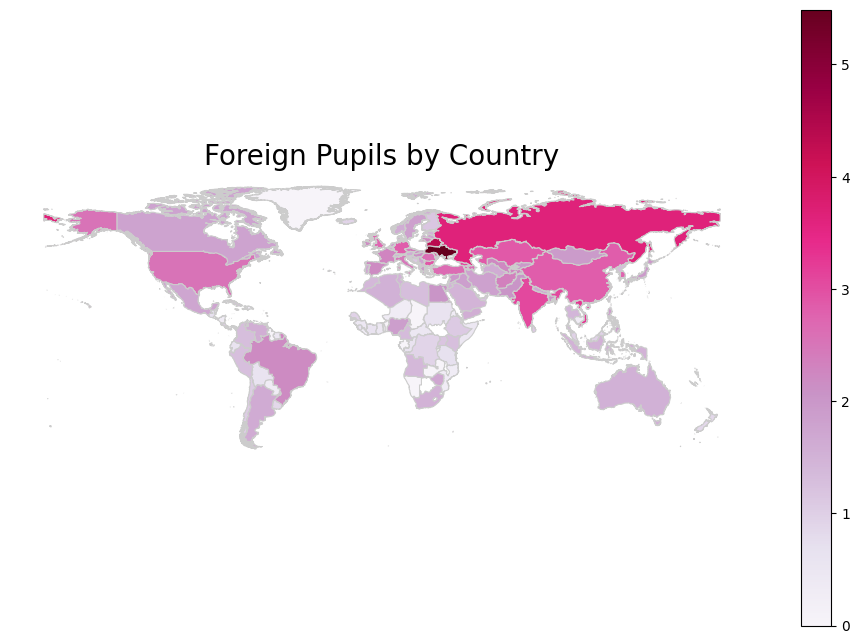

In [16]:
gdf = gpd.read_file('/content/drive/MyDrive/project_pupils/ne_10m_admin_0_countries_ukr.geojson')

results = df.groupby(['Original'])['Number_pupils'].sum().reset_index()
#I transform the data into logarithmic values. The purpose of this was to normalize the data as there is a significant difference in numerical values between the first country and the subsequent ones.
results['Number_pupils_log'] = np.log10(results['Number_pupils'])

merged_data = gdf.merge(results, left_on='NAME', right_on='Original', how='left')

fig, ax = plt.subplots(figsize=(12, 8))
merged_data.plot(column='Number_pupils_log', cmap='PuRd', linewidth=0.8, ax=ax, edgecolor='0.8')

ax.set_title('Foreign Pupils by Country', fontdict={'fontsize': '20'})


ax.axis('off')


sm = plt.cm.ScalarMappable(cmap='PuRd')
sm.set_array(merged_data['Number_pupils_log'])
cbar = plt.colorbar(sm)


plt.show()


###**We can see that pupils from almost all countries of the world study in Poland. Now let's see which Polish cities have the most internatinal pupils.**

In [14]:
results_gmina= df.groupby(['Gmina'])['Number_pupils'].sum().reset_index().sort_values('Number_pupils', ascending = False).head(10)
results_gmina

,Gmina,Number_pupils
1999,st. Warszawa,44980
1892,Wrocław,24253
742,Kraków,17697
1275,Poznań,14932
2046,Łódź,11443
382,Gdańsk,11050
1659,Szczecin,9062
157,Bydgoszcz,5777
624,Katowice,4772
54,Białystok,4602


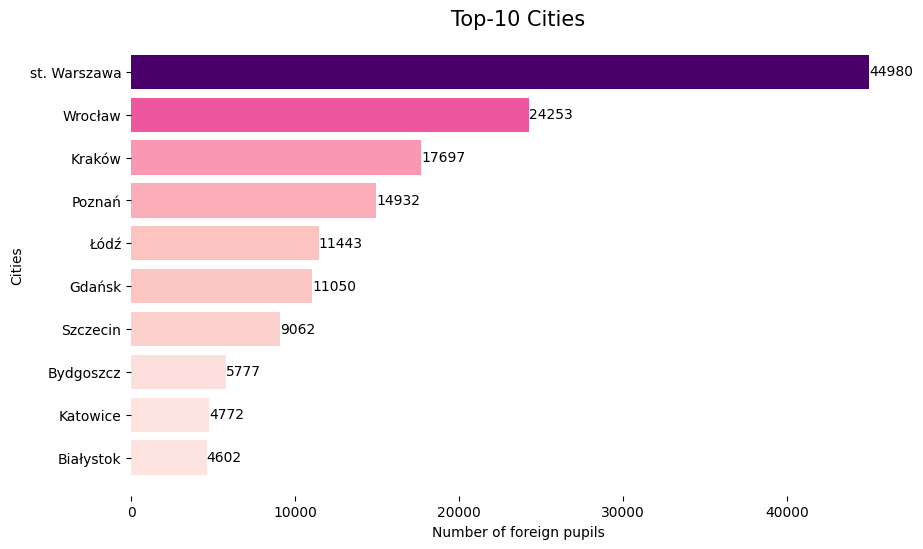

In [15]:
y = results_gmina['Gmina']
x = results_gmina['Number_pupils']


sorted_df = results_gmina.sort_values(by='Number_pupils', ascending=True)
sorted_y = sorted_df['Gmina']
sorted_x = sorted_df['Number_pupils']

fig, ax = plt.subplots(figsize=(10, 6))


colormap = cm.get_cmap('RdPu')
bars = ax.barh(sorted_y, sorted_x, color=colormap(sorted_x/max(sorted_x)))

ax.bar_label(bars)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.ylabel("Cities", size = 10)
plt.xlabel("Number of foreign pupils", size = 10)
plt.title("Top-10 Cities", size = 15)

plt.show()


**Conclusions:**


*   **Regional Distribution:**
The analysis reveals that the Mazovian, Lower Silesian, and Greater Poland voivodeships have the highest concentration of foreign pupils in Poland. These regions attract a significant number of international pupils, indicating their popularity and favorable educational opportunities.

*   **Country of Origin:**
Among the diverse pool of foreign pupils in Poland, the largest number hails from Ukraine, Belarus, Russia, Vietnam, and India. This finding highlights the international appeal of Polish education, as pupils from various countries choose to pursue their academic journey in Poland.

*   **Concentration in Major Cities:**
It is noteworthy that a significant proportion of foreign pupils are enrolled in schools located in Warsaw, Wrocław, and Kraków. These cities not only serve as major cultural and economic hubs but also offer a diverse range of educational institutions.

Overall, these findings underscore the importance of understanding the geographical distribution, country-specific trends, and urban concentration of foreign pupils in Poland. This knowledge can assisteducational institutions, and relevant stakeholders in developing targeted strategies to enhance the educational experience and support services for international pupils in different regions of Poland.




### **Data sources:**

- DataFrame taken from the [open data resource](https://dane.gov.pl/pl).

- World map source - [natural earth](https://github.com/nvkelso/natural-earth-vector/blob/master/geojson/ne_10m_admin_0_countries_ukr.geojson).

- Map of [Polish Voivodeships](https://github.com/andilabs/polska-wojewodztwa-geojson/blob/master/polska-wojewodztwa.geojson).
